### **Stock Market Prediction and Forecasting using Stacked LSTM**

In [54]:
# Keras and Tensorflow > 2.0

In [55]:
# Data Collection
# import pandas_datareader as pdr

In [56]:
# open piingo site and get the key for apple computers and add in below line
# df = pdr.get_data_tiingo('AAPL',api_key=key)

In [57]:
# df.to_csv('AAPL.csv')

In [58]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [59]:
import pandas as pd

In [60]:
df = pd.read_csv('/gdrive/My Drive/AAPL.csv')

In [61]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
1,2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2,2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
3,2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
4,2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79


In [62]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
6076,1984-09-13,27.50,27.62,27.50,27.50,7429600,3.14
6077,1984-09-12,26.87,27.00,26.12,26.12,4773600,2.98
6078,1984-09-11,26.62,27.37,26.62,26.87,5444000,3.07
6079,1984-09-10,26.50,26.62,25.87,26.37,2346400,3.01
6080,1984-09-07,26.50,26.87,26.25,26.50,2981600,3.02


In [63]:
df1 = df.reset_index()['Close']

In [64]:
df1.shape

(6081,)

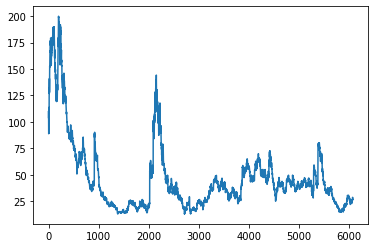

In [65]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [66]:
# LSTM are sensitive to the scale of the data, so we apply MinMax Scaler

In [67]:
import numpy as np

In [68]:
df1[0:5]

0    104.08
1    110.26
2     96.80
3     88.74
4     89.79
Name: Close, dtype: float64

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [70]:
df1[0:5]

array([[0.48766654],
       [0.52073412],
       [0.44871315],
       [0.40558617],
       [0.41120445]])

In [71]:
# Splitting dataset into train and test split
training_size = int(len(df1)*0.75)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [72]:
# indexes of training and test data
# till 119 is my training data
# then next 65 is my test data

training_size,test_size

(4560, 1521)

In [73]:
print(len(train_data),len(test_data))

4560 1521


In [74]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]   # for i=0   0,1,2,3,........99     data points = 100
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)


In [75]:
# reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [76]:
print(X_train)

[[0.48766654 0.52073412 0.44871315 ... 0.9314035  0.92830007 0.90015517]
 [0.52073412 0.44871315 0.40558617 ... 0.92830007 0.90015517 0.87811012]
 [0.44871315 0.40558617 0.41120445 ... 0.90015517 0.87811012 0.88420996]
 ...
 [0.25116379 0.23976671 0.23511156 ... 0.09930975 0.09995184 0.1046605 ]
 [0.23976671 0.23511156 0.23976671 ... 0.09995184 0.1046605  0.10936915]
 [0.23511156 0.23976671 0.22638985 ... 0.1046605  0.10936915 0.11134892]]


In [77]:
print(X_train.shape, y_train.shape)

(4459, 100) (4459,)


In [78]:
print(X_test.shape, y_test.shape)

(1420, 100) (1420,)


In [79]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [80]:
# Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [81]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='Adam')

In [82]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
70/70 [==============================] - 5s 29ms/step - loss: 0.0138 - val_loss: 4.4522e-04
Epoch 2/100
70/70 [==============================] - 1s 16ms/step - loss: 7.8011e-04 - val_loss: 4.1064e-04
Epoch 3/100
70/70 [==============================] - 1s 16ms/step - loss: 6.9208e-04 - val_loss: 5.6374e-04
Epoch 4/100
70/70 [==============================] - 1s 16ms/step - loss: 7.3719e-04 - val_loss: 3.5944e-04
Epoch 5/100
70/70 [==============================] - 1s 16ms/step - loss: 6.1862e-04 - val_loss: 3.2647e-04
Epoch 6/100
70/70 [==============================] - 1s 16ms/step - loss: 5.7974e-04 - val_loss: 2.8675e-04
Epoch 7/100
70/70 [==============================] - 1s 16ms/step - loss: 5.5412e-04 - val_loss: 2.9930e-04
Epoch 8/100
70/70 [==============================] - 1s 16ms/step - loss: 5.4142e-04 - val_loss: 2.7743e-04
Epoch 9/100
70/70 [==============================] - 1s 16ms/step - loss: 5.7251e-04 - val_loss: 2.3721e-04
Epoch 10/100
70/70 [============

In [83]:
import tensorflow as tf
tf.__version__

'2.4.0'

In [84]:
# Lets do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [85]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [86]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

59.030648322005206

In [87]:
# Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

39.82612214236041

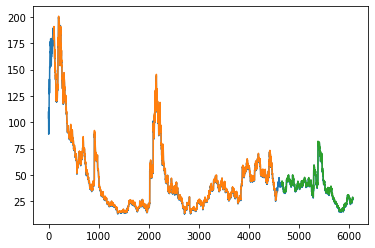

In [88]:
# Plotting

# Shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [89]:
len(test_data)

1521

In [90]:
# previous 100 days
1521-100

1421

In [91]:
x_input = test_data[1421:].reshape(1,-1)
x_input.shape

(1, 100)

In [92]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [93]:
temp_input[0:5]

[0.09058804644443255,
 0.09262132805393547,
 0.08925036117502275,
 0.08593290170688642,
 0.08925036117502275]

In [94]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output = []
n_steps = 100
i=0

while(i<30):
  if(len(temp_input)>100):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    lst_output.extend(yhat.tolist())
    i = i+1
  else:
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i = i+1

print(lst_output)

[0.07521631]
101
1 day input [0.09262133 0.08925036 0.0859329  0.08925036 0.09192573 0.08727059
 0.08389962 0.08122425 0.09262133 0.09128364 0.0946011  0.08994596
 0.09128364 0.08459522 0.08058216 0.08191985 0.08256193 0.08256193
 0.07988656 0.08657499 0.08459522 0.07924448 0.07854888 0.07790679
 0.07523142 0.07721119 0.07790679 0.08389962 0.07523142 0.07186045
 0.06854299 0.06720531 0.07186045 0.07389373 0.0765691  0.07721119
 0.07052277 0.06383434 0.06115897 0.06319225 0.06650971 0.06918508
 0.06249666 0.0591792  0.05784151 0.05447054 0.05179517 0.04778212
 0.05516614 0.05784151 0.05784151 0.05650383 0.05982129 0.05516614
 0.06319225 0.06854299 0.07121836 0.06319225 0.06383434 0.06452994
 0.06383434 0.06452994 0.06319225 0.06249666 0.06586762 0.07121836
 0.06988068 0.06650971 0.0678474  0.0678474  0.06383434 0.0584836
 0.0591792  0.05249077 0.05784151 0.0584836  0.06249666 0.06383434
 0.06383434 0.06650971 0.06517203 0.06319225 0.06185457 0.06517203
 0.06854299 0.06854299 0.07052277 

In [95]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [96]:
import matplotlib.pyplot as plt

In [97]:
len(df1)

6081

In [98]:
6081-100

5981

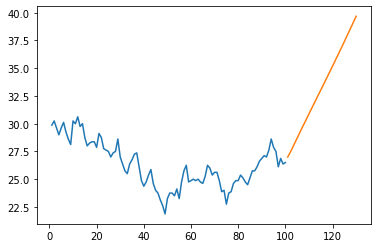

In [99]:
plt.plot(day_new,scaler.inverse_transform(df1[5981:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

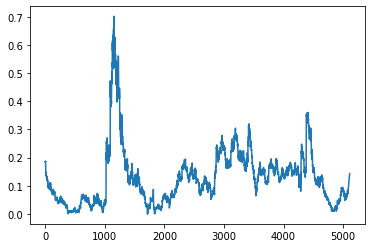

In [100]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

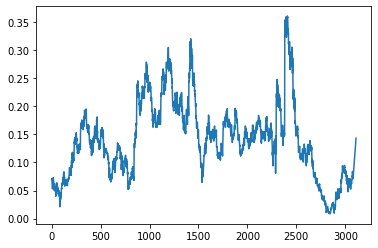

In [101]:
plt.plot(df3[3000:])